# Linear Regression

In [4]:
%matplotlib inline

In [110]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,classification_report

In [111]:
df=pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
529,-122.25,37.77,52,859,157,429,158,4.3098,197900
530,-122.26,37.78,52,970,217,528,208,3.3438,201300
531,-122.26,37.78,52,1045,239,496,216,2.9213,190800
532,-122.27,37.78,52,1408,280,718,265,2.6806,207900


In [112]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,-122.233764,37.812547,44.861423,1849.966292,405.344569,957.127341,381.142322,3.380584,196205.823970
std,0.043577,0.044328,9.084938,1156.707316,288.157290,561.391372,268.755932,2.009543,104187.004155
min,-122.340000,37.730000,2.000000,12.000000,4.000000,18.000000,7.000000,0.499900,60000.000000
25%,-122.270000,37.780000,41.000000,1057.000000,233.500000,576.000000,218.250000,2.059400,112500.000000
50%,-122.240000,37.810000,49.000000,1655.500000,353.500000,860.000000,334.500000,2.799200,162500.000000
75%,-122.200000,37.850000,52.000000,2322.500000,474.000000,1170.250000,458.250000,4.045600,257700.000000
max,-122.120000,37.900000,52.000000,12842.000000,2477.000000,4985.000000,2323.000000,13.499000,500001.000000


In [113]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           534 non-null    float64
 1   latitude            534 non-null    float64
 2   housing_median_age  534 non-null    int64  
 3   total_rooms         534 non-null    int64  
 4   total_bedrooms      534 non-null    int64  
 5   population          534 non-null    int64  
 6   households          534 non-null    int64  
 7   median_income       534 non-null    float64
 8   median_house_value  534 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 37.7 KB


In [114]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [115]:
df=df.fillna(df.mean())

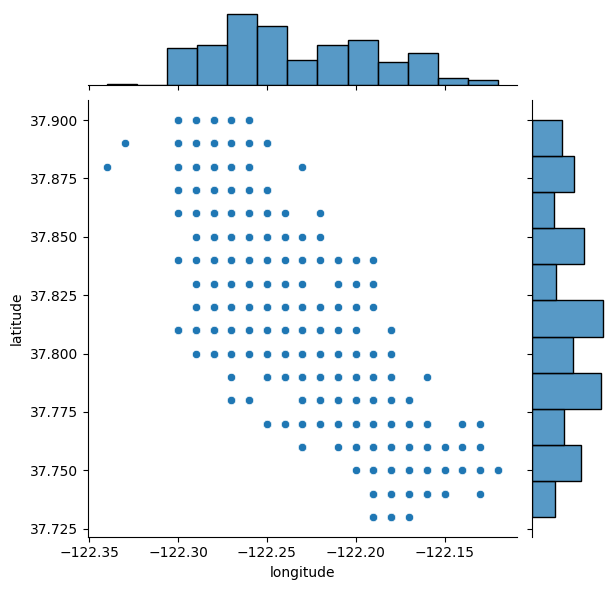

In [116]:
sns.jointplot(x='longitude',y='latitude',kind='scatter',data=df)
plt.show()

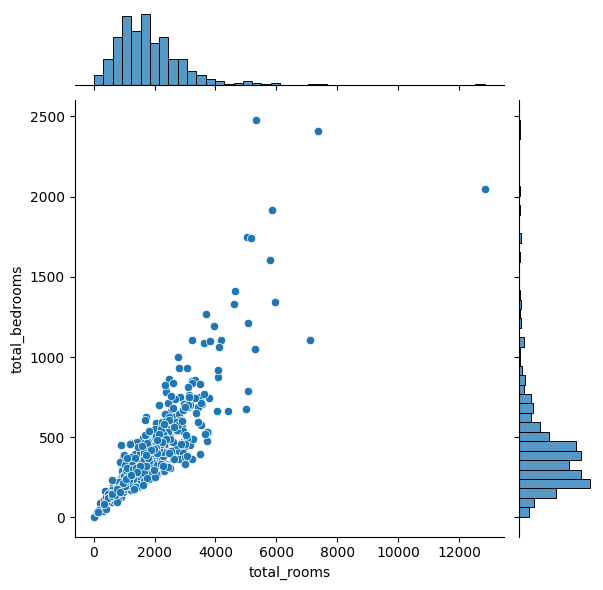

In [117]:
sns.jointplot(x='total_rooms',y='total_bedrooms',kind='scatter',data=df)
plt.show()

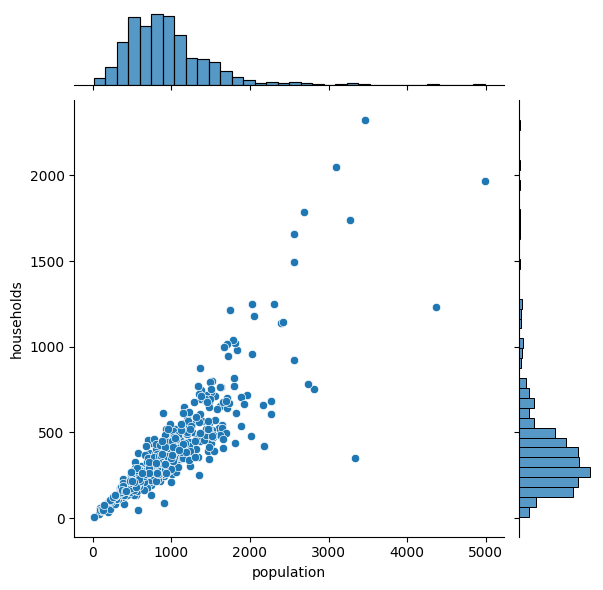

In [118]:
sns.jointplot(x='population',y='households',kind='scatter',data=df)
plt.show()

In [119]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

<Axes: xlabel='median_house_value'>

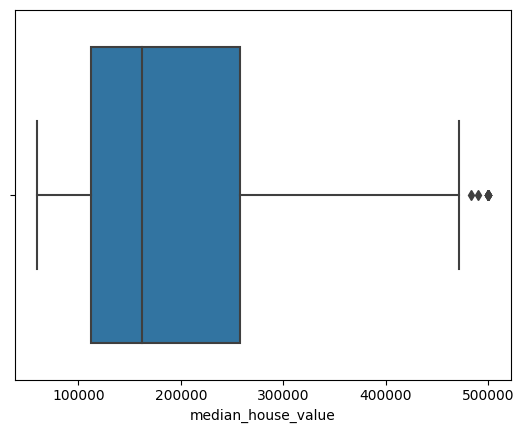

In [120]:
sns.boxplot(x=df['median_house_value'])

In [121]:
q1=df['median_house_value'].quantile(0.25)
q3=df['median_house_value'].quantile(0.75)
iqr = q3 -q1
iqr

145200.0

In [122]:
upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr
upper_limit,lower_limit

(475500.0, -105300.0)

In [123]:
def limit_imput(value):
    if value > upper_limit:
        return upper_limit
    elif value < lower_limit:
        return lower_limit
    else:
        return value

In [124]:
df1= df['median_house_value'].apply(limit_imput)

In [125]:
df1.describe()

count       534.000000
mean     195705.992509
std      102777.467771
min       60000.000000
25%      112500.000000
50%      162500.000000
75%      257700.000000
max      475500.000000
Name: median_house_value, dtype: float64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           534 non-null    float64
 1   latitude            534 non-null    float64
 2   housing_median_age  534 non-null    int64  
 3   total_rooms         534 non-null    int64  
 4   total_bedrooms      534 non-null    int64  
 5   population          534 non-null    int64  
 6   households          534 non-null    int64  
 7   median_income       534 non-null    float64
 8   median_house_value  534 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 37.7 KB


In [127]:
df.mean()

longitude               -122.233764
latitude                  37.812547
housing_median_age        44.861423
total_rooms             1849.966292
total_bedrooms           405.344569
population               957.127341
households               381.142322
median_income              3.380584
median_house_value    196205.823970
dtype: float64

In [128]:
df.median()

longitude               -122.2400
latitude                  37.8100
housing_median_age        49.0000
total_rooms             1655.5000
total_bedrooms           353.5000
population               860.0000
households               334.5000
median_income              2.7992
median_house_value    162500.0000
dtype: float64

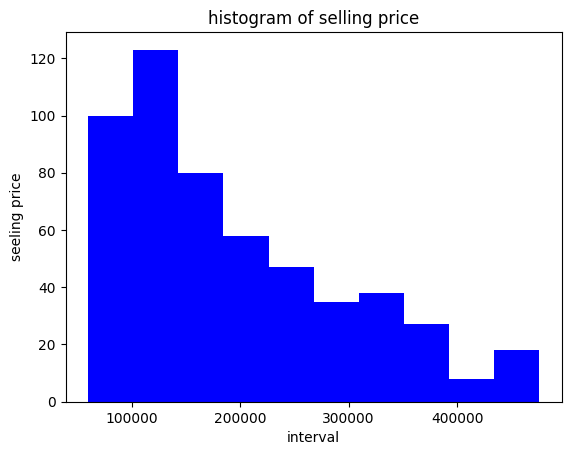

In [130]:
plt.hist(df1,bins=10,color='blue')
plt.xlabel('interval')
plt.ylabel('seeling price')
plt.title('histogram of selling price')
plt.show()

In [131]:
model=LinearRegression()

In [133]:
df1

0      452600.0
1      358500.0
2      352100.0
3      341300.0
4      342200.0
         ...   
529    197900.0
530    201300.0
531    190800.0
532    207900.0
533    215300.0
Name: median_house_value, Length: 534, dtype: float64

In [134]:
y.head

<bound method NDFrame.head of 0      452600
1      358500
2      352100
3      341300
4      342200
        ...  
529    197900
530    201300
531    190800
532    207900
533    215300
Name: median_house_value, Length: 534, dtype: int64>

In [251]:
from sklearn.preprocessing import StandardScaler 

In [252]:
X_std=StandardScaler().fit_transform(X)

In [253]:
#y=y.to_numpy()

In [268]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.2,random_state=4)

In [269]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(427, 8)
(107, 8)
(427,)
(107,)


<Axes: >

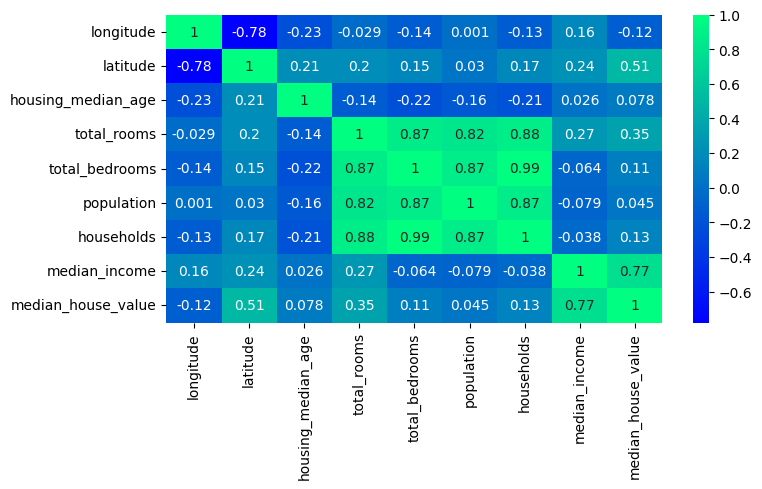

In [270]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,cmap='winter')

In [271]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

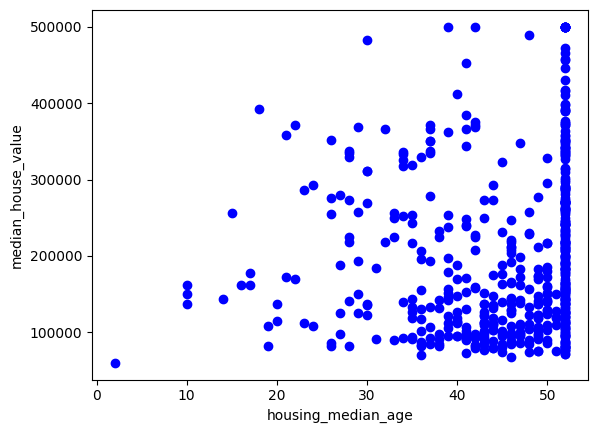

In [272]:
plt.scatter(X.housing_median_age, y,  color='blue')
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.show()

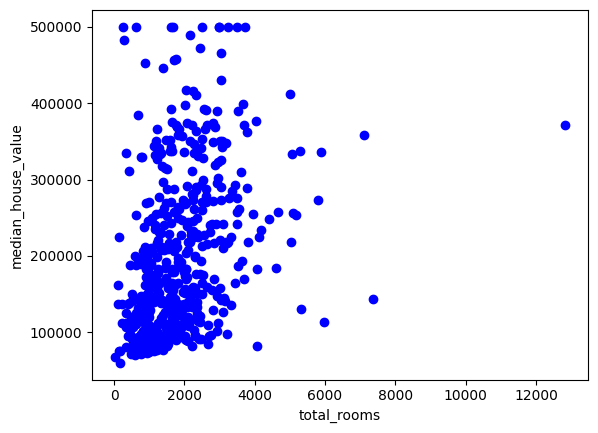

In [273]:
plt.scatter(X.total_rooms, y,  color='blue')
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.show()

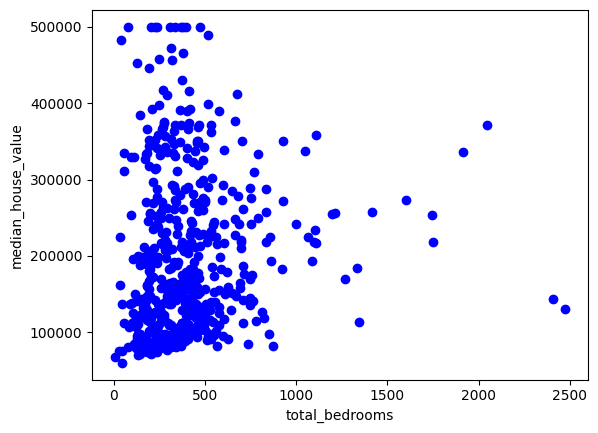

In [274]:
plt.scatter(X.total_bedrooms, y,  color='blue')
plt.xlabel("total_bedrooms")
plt.ylabel("median_house_value")
plt.show()

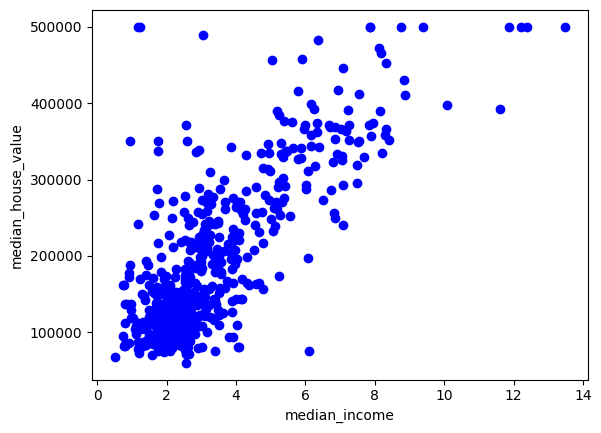

In [275]:
plt.scatter(X.median_income, y,  color='blue')
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

In [276]:
model.fit(X_train,y_train)

LinearRegression()

In [277]:
pred=model.predict(X_test)
pred

array([147184.57844831, 260924.34821697, 212352.63857952, 138311.55761003,
       106038.76569929, 158416.50272847, 168731.54853449, 190691.82799126,
       103631.10969325, 231655.45019544, 108422.78542589, 247167.25508706,
       185657.57178886, 168157.35373541, 350726.92708372, 175457.50447626,
        88064.22915614, 162351.54365894, 277862.02163322, 222076.6049705 ,
       140820.47972042, 368120.14067695, 350302.71858972,  95758.22418387,
       381564.05699128, 299323.98081838, 104196.21240095, 223224.54929198,
       254746.42596171, 359803.06983075, 112242.48994714, 302446.23423143,
       239402.91878138, 389716.50380966, 156216.86772801, 178403.64265972,
       161369.97020756, 115377.20397506, 277599.21772111, 205712.31970716,
       326212.87293135, 488746.30850022, 252128.78265938, 103238.96562484,
       281712.67138039, 104093.36058797, 115943.28095258,  88471.7129178 ,
       187664.4310327 , 190140.26624517,  78557.99553272, 158408.76866478,
       332602.30365869, 1

In [278]:
model.score(X_train,y_train)

0.7281802308962997

In [279]:
model.score(X_test,y_test)

0.7134048336705684

In [267]:
mean_squared_error(y_test,pred)

4320787399.675591